In [8]:
import pandas as pd

# 1) Load data (update filename if different)
df = pd.read_csv('/content/survey.csv')

# 2) Basic info
print(df.shape)          # rows, columns
print(df.columns)        # all column names
print(df.head(3))        # first 3 rows
print(df.isnull().sum()) # missing values per column


(1259, 27)
Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
             Timestamp  Age  Gender        Country state self_employed  \
0  2014-08-27 11:29:31   37  Female  United States    IL           NaN   
1  2014-08-27 11:29:37   44       M  United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male         Canada   NaN           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1

In [9]:
import numpy as np

# 1) Keep realistic ages
if 'Age' in df.columns:
    df = df[(df['Age'] >= 15) & (df['Age'] <= 70)]

# 2) Clean gender into 3 groups
def clean_gender(g):
    if pd.isnull(g):
        return 'Other'
    g = str(g).strip().lower()
    if 'male' in g or g in ['m', 'man']:
        return 'Male'
    if 'female' in g or g in ['f', 'woman']:
        return 'Female'
    return 'Other'

if 'Gender' in df.columns:
    df['Gender_clean'] = df['Gender'].apply(clean_gender)

# 3) Check result
print(df[['Age', 'Gender', 'Gender_clean']].head())
print(df[['Age', 'Gender_clean']].describe(include='all'))


   Age  Gender Gender_clean
0   37  Female         Male
1   44       M         Male
2   32    Male         Male
3   31    Male         Male
4   31    Male         Male
                Age Gender_clean
count   1250.000000         1250
unique          NaN            3
top             NaN         Male
freq            NaN         1169
mean      32.044800          NaN
std        7.203076          NaN
min       18.000000          NaN
25%       27.000000          NaN
50%       31.000000          NaN
75%       36.000000          NaN
max       65.000000          NaN


In [10]:
# 1) See percentage of missing values
missing_pct = df.isnull().mean().sort_values(ascending=False)
print(missing_pct.head(15))  # top 15 most-missing columns


comments            0.8712
state               0.4104
work_interfere      0.2096
self_employed       0.0144
Country             0.0000
Gender              0.0000
Age                 0.0000
family_history      0.0000
treatment           0.0000
no_employees        0.0000
remote_work         0.0000
Timestamp           0.0000
tech_company        0.0000
benefits            0.0000
wellness_program    0.0000
dtype: float64


In [11]:
# 2) Drop columns with > 50% missing
cols_many_missing = missing_pct[missing_pct > 0.5].index
df = df.drop(columns=cols_many_missing)

# 3) Fill remaining categorical NaN with 'Unknown'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

# 4) Fill numeric NaN with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# 5) Check again
print(df.isnull().sum().head(15))
print("Rows:", df.shape[0], "Columns:", df.shape[1])


Timestamp           0
Age                 0
Gender              0
Country             0
state               0
self_employed       0
family_history      0
treatment           0
work_interfere      0
no_employees        0
remote_work         0
tech_company        0
benefits            0
care_options        0
wellness_program    0
dtype: int64
Rows: 1250 Columns: 27


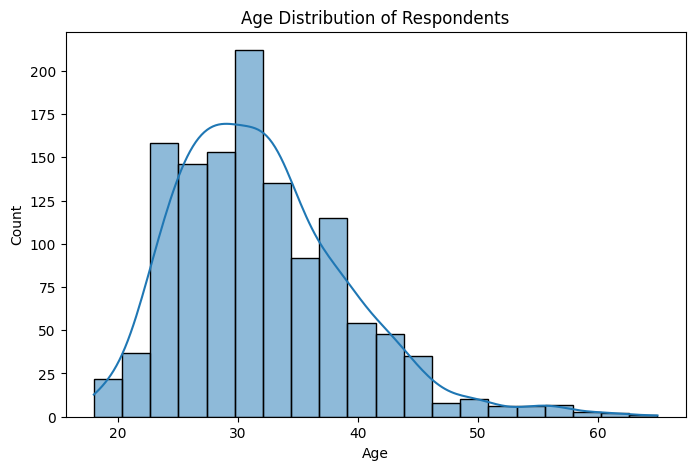

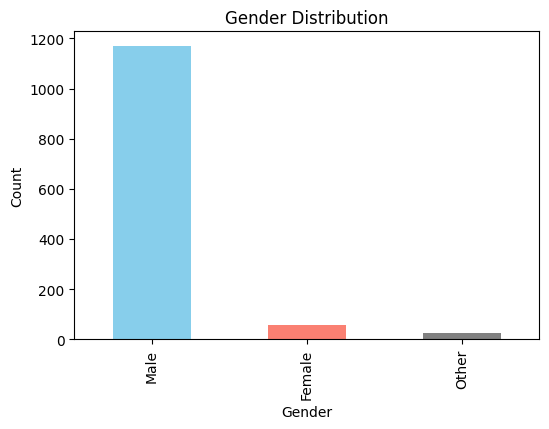

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution (cleaned)
plt.figure(figsize=(6,4))
df['Gender_clean'].value_counts().plot(kind='bar', color=['skyblue','salmon','gray'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [13]:
print(list(df.columns))


['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'Gender_clean']


mental_health_consequence
No       487
Maybe    475
Yes      288
Name: count, dtype: int64


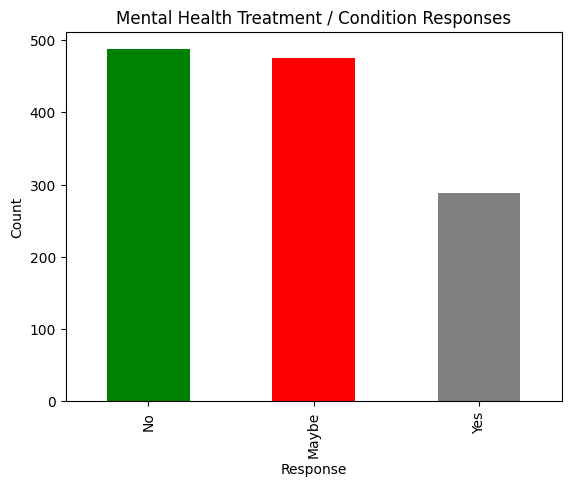

In [15]:
col_mh = 'mental_health_consequence'  # change to your column

print(df[col_mh].value_counts())

df[col_mh].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title('Mental Health Treatment / Condition Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


mental_health_consequence      Maybe         No        Yes
Gender_clean                                              
Female                     40.350877  33.333333  26.315789
Male                       37.810094  39.349872  22.840034
Other                      41.666667  33.333333  25.000000


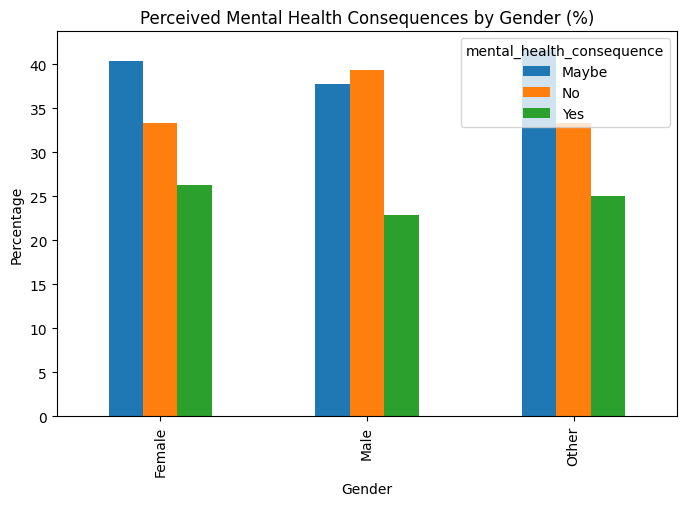

In [16]:
ct = pd.crosstab(df['Gender_clean'], df[col_mh], normalize='index') * 100
print(ct)

ct.plot(kind='bar', figsize=(8,5))
plt.title('Perceived Mental Health Consequences by Gender (%)')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title=col_mh)
plt.show()


In [17]:
print([c for c in df.columns if 'family' in c.lower()])
print([c for c in df.columns if 'remote' in c.lower()])
print([c for c in df.columns if 'benefit' in c.lower()])


['family_history']
['remote_work']
['benefits']


family_history
No     762
Yes    488
Name: count, dtype: int64
mental_health_consequence      Maybe         No        Yes
family_history                                            
No                         37.139108  42.257218  20.603675
Yes                        39.344262  33.811475  26.844262


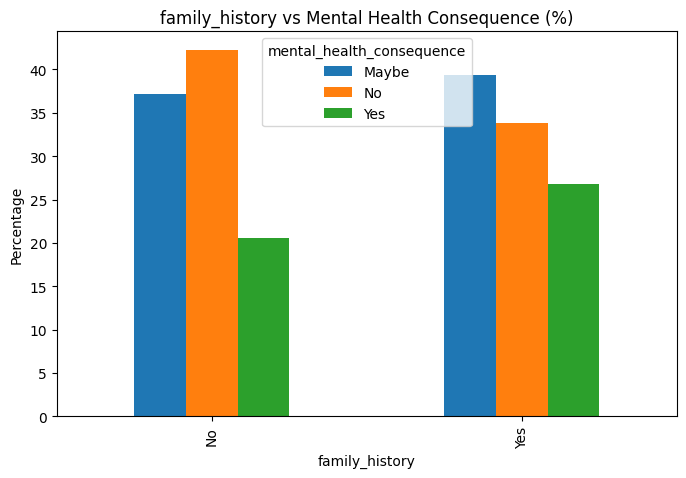

In [18]:
col_factor = 'family_history'  # change to your actual column

print(df[col_factor].value_counts())

ct2 = pd.crosstab(df[col_factor], df['mental_health_consequence'], normalize='index') * 100
print(ct2)

ct2.plot(kind='bar', figsize=(8,5))
plt.title(f'{col_factor} vs Mental Health Consequence (%)')
plt.ylabel('Percentage')
plt.xlabel(col_factor)
plt.legend(title='mental_health_consequence')
plt.show()


mental_health_consequence      Maybe         No        Yes
family_history                                            
No                         37.139108  42.257218  20.603675
Yes                        39.344262  33.811475  26.844262


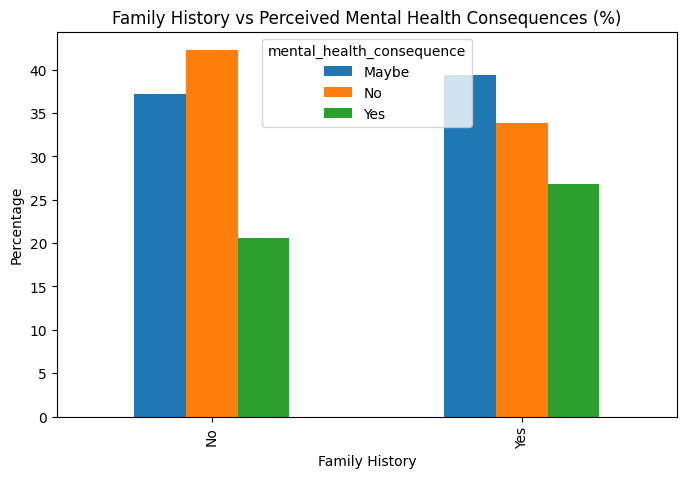

In [19]:
ct2 = pd.crosstab(df['family_history'], df['mental_health_consequence'], normalize='index') * 100
print(ct2)

ct2.plot(kind='bar', figsize=(8,5))
plt.title('Family History vs Perceived Mental Health Consequences (%)')
plt.ylabel('Percentage')
plt.xlabel('Family History')
plt.legend(title='mental_health_consequence')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 1) Choose columns
feature_cols = ['Age', 'Gender_clean', 'family_history']
feature_cols = [c for c in feature_cols if c in df.columns]  # keep only existing

# 2) Copy to new DataFrame
data_ml = df[feature_cols + ['mental_health_consequence']].copy()

# 3) Encode categorical columns
le_dict = {}
for col in feature_cols + ['mental_health_consequence']:
    if data_ml[col].dtype == 'object':
        le = LabelEncoder()
        data_ml[col] = le.fit_transform(data_ml[col])
        le_dict[col] = le

# 4) Split X, y
X = data_ml[feature_cols]
y = data_ml['mental_health_consequence']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(1000, 3) (250, 3)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      0.46      0.43        95
           1       0.42      0.60      0.49        97
           2       0.00      0.00      0.00        58

    accuracy                           0.41       250
   macro avg       0.27      0.35      0.31       250
weighted avg       0.31      0.41      0.35       250

[[44 51  0]
 [39 58  0]
 [28 30  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': model.coef_[0]
})
print(coef_df)


          feature  coefficient
0             Age    -0.004499
1    Gender_clean     0.000499
2  family_history     0.026583
